# Inaugural Project

Imports and set magics:

In [8]:
import numpy as np
import math
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [9]:
#The parameters are defined
m=1 #cash on hand
t0=0.4 #standard labour income tax
t1=0.1 #top bracket labour income tax
k=0.4 #cut off for the top labour income bracket
w=1 #wage rate
epsilon=0.3 #Frisch elasticity of labour supply
v=10 #scales the disutility of labour
l = range(0,1) #labour supply

#The utily function is defined
def ufunc(l,x,v=10,epsilon=0.3):
    """ 
    Args:
        x (float): equals consumption
        l (float): labor supply
        v (float): disutility of labour
        epsilon (float): frisch elasticity of labor supply
    
    Returns:
        The utility function
    """
    return np.log(x)-v*((l**(1+1/epsilon))/(1+1/epsilon))

#Defining a function to minimize and including the constraint
def value_of_choice(l,x,m,w,t0,t1,k,v,epsilon):
    """ 
    Args:
        l (float): labor supply
        x (float): total ressources
        m (int): cash on hand
        w (int): wage rate
        t0 (float): standard labour income tax
        t1 (float): tob bracket labour income tax
        k (float): cut off for the top labour income bracket
        v (float): disutility of labour
        epsilon (float): frisch elasticity of labor supply
    
    Returns:
        The negative utility as a function of total ressources
    """
    x = m + w*l-(t0*w*l + t1*np.fmax(w*l-k,0))
    return -ufunc(l,x,v,epsilon)


#The negative utility function is minimized and thereby the utility function is maximized
sol_case1 = optimize.minimize_scalar(
    value_of_choice,l,method='bounded',
    bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon))

#The solution is unpacked
l = sol_case1.x
x = m + w*l-(t0*w*l + t1*np.fmax(w*l-k,0))
u = ufunc(l,x,v=10,epsilon=0.3)

consumer_optimum = [l,x,u]


print(f'Optimal labour supply: {l:.1f}')
print(f'Optimal consumption: {x:.2f}')
print(f'Utility: {u:.2f}')

Optimal labour supply: 0.4
Optimal consumption: 1.24
Utility: 0.17


# Question 2

<function matplotlib.pyplot.show(*args, **kw)>

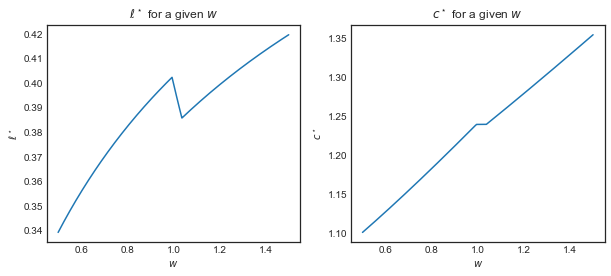

In [10]:
#We choose the number of individuals to be 10,000
N=10000

#The interval for w is chosen and empty arrays are made for the variables
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
x_values = np.empty(N)

#The constraint is defined
def constraint(l,w):
    """ 
    Args:
        l (float): labor supply
        w (int): wage rate
    
    Returns:
        The budget constraint
    """
    cons = m + w*l-(t0*w*l + t1*np.fmax(w*l-k,0))
    return cons

#A loop is created to generate results for the values of l and x w
for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon),method="bounded")
    l_values[i] = result.x #Optimal labour supply
    x_values[i] = constraint(l_values[i],w) #Optimal consumption

#Create the plot
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))

#l^star as a function of w is plotted
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_values,l_values)

ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$\ell^\star$')
ax_left.set_title('$\ell^\star$ for a given $w$')

#c^star as a function of w is plotted
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_values,x_values)
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.set_title('$c^\star$ for a given $w$')

plt.show

# Question 3

In [11]:
#The tax revenued is defined as the sum of revenues from each individual, N

def tax(w_values,l_values,t0,t1,k,epsilon):
    """ 
    Args:
        w_values (array): wage rates
        l_values: labor supply
        t0 (float): standard labour income tax
        t1 (float): tob bracket labour income tax
        k (float): cut off for the top labour income bracket
        epsilon (float): frisch elasticity of labor supply 
    
    Returns:
        The tax revenue
    """
    for i,w in enumerate(w_values):
        result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon),method="bounded")
        l_values[i] = result.x #Optimal labour supply
        x_values[i] = constraint(l_values[i],w) #Optimal consumption
        
    revenue = np.sum(t0*w_values*l_values + t1*np.fmax(w_values*l_values-k,0))
    return revenue

print(f'Total tax revenue: {tax(w_values,l_values,t0,t1,k,epsilon):.1f} currency units')

Total tax revenue: 1630.2 currency units


# Question 4

In [12]:
#The new value of elasticity is defined
epsilon2=0.1

print(f'Total tax revenue for epsilon = 0.1: {tax(w_values,l_values,t0,t1,k,epsilon2):.1f} currency units')

Total tax revenue for epsilon = 0.1: 3196.9 currency units


# Question 5

In [ ]:
#We define the negative tax function to optimize the variables t0, t1, kappa
def taxfunc(x):
    """ 
    Args:
        x (list): contains optimal values for tax-related parameters
    
    Returns:
        The negative tax revenue
    """
    # we are now creating vectors x
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    
    return -tax(w_values,l_values,tau0,tau1,kappa,epsilon)

#We define the bounds to use for optimisation
bounds = ((0,1),(0,1),(0,1.5))

#We define an array to contain our parameters 
x0 = np.array([t0,t1,k])

#We solve the optimisation problem
optimal_tax = optimize.minimize(taxfunc,x0,method='SLSQP',bounds=bounds,args=(),options={'disp':True})

In [ ]:
#We define the optimal parameters
tau0_op = optimal_tax.x[0]
tau1_op = optimal_tax.x[1]
kappa_op = optimal_tax.x[2]
utility_op = -optimal_tax.fun

#The result is printes
print(f'tau0 = {tau0_op:.6f}')
print(f'tau1 = {tau1_op:.6f}')
print(f'kappa = {kappa_op:.1f}')
print(f'utility = {utility_op:.4f}')

# Conclusion

From our results we can conclude that higher wages generally result in greater labour supply and consumption.
It can be observed from the figures how the labour supply drops for a wage equal to 1, but after this it follows the same growth pattern.
It is found that the tax revenue for the given parameters is equal to 1630.2, whereas the tax revenue with epsilon = 0.1 is around double that amount; 3196.9. Based on our initial guesses we advise the politician to choose a standard labour income tax of 78.54% and a top bracket labour income tax of approximately 0%. From this the politician would gain a tax revenue of 2466.86 currency units.

![test](https://media.giphy.com/media/13HgwGsXF0aiGY/source.gif)